In [1]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(max_depth = 3, random_state = 156)
iris_data = load_iris()
X_train, X_test, y_train, t_test = train_test_split(iris_data.data, iris_data.target,test_size = 0.2, random_state = 11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

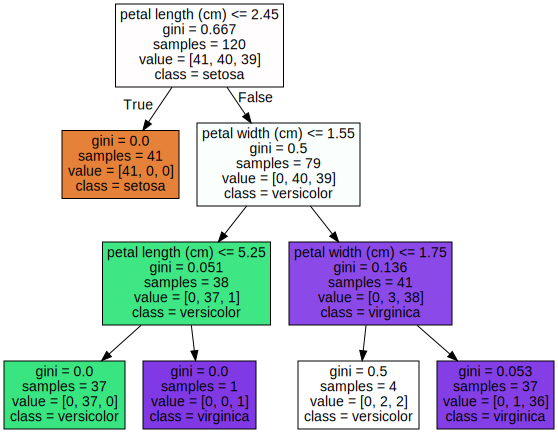

In [2]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled = True)
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances : 
 [0.    0.    0.558 0.442]
sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.558
petal width (cm) : 0.442


<Axes: >

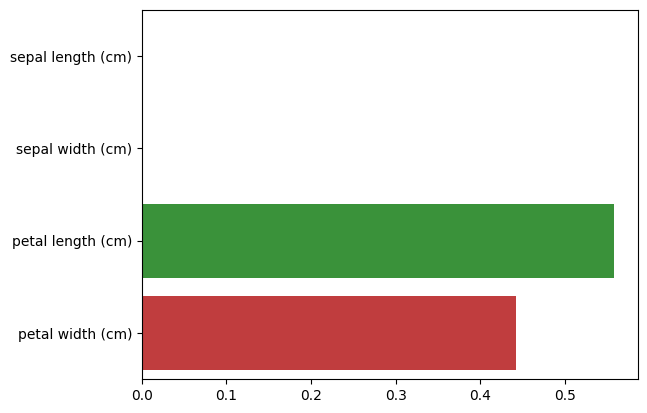

In [3]:
import seaborn as sns
import numpy as np
%matplotlib inline
# feature importance 추출
print("Feature importances : \n {0}".format(np.round(dt_clf.feature_importances_, 3)))
# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))
# feature importances를 column별로 시각화하기
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

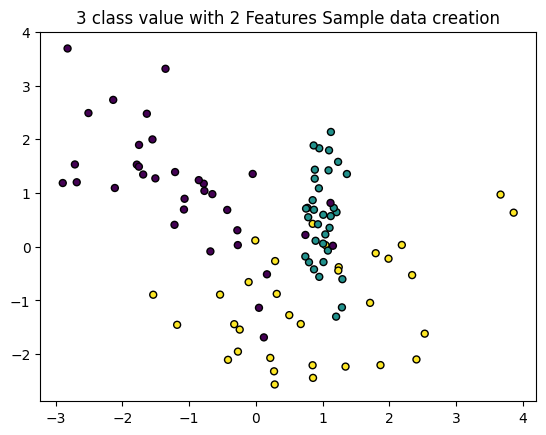

In [4]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 class value with 2 Features Sample data creation")
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, n_classes = 3, n_clusters_per_class = 1, random_state = 0)

plt.scatter(X_features[:,0], X_features[:, 1], marker = 'o', c= y_labels, s = 25, edgecolor = 'k')

# redundant : 여분의, 중복된

In [5]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

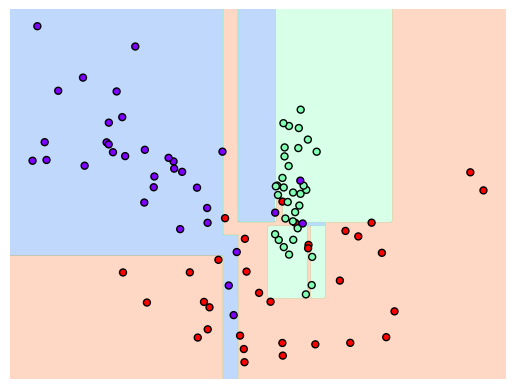

In [6]:
# visualize boundary
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

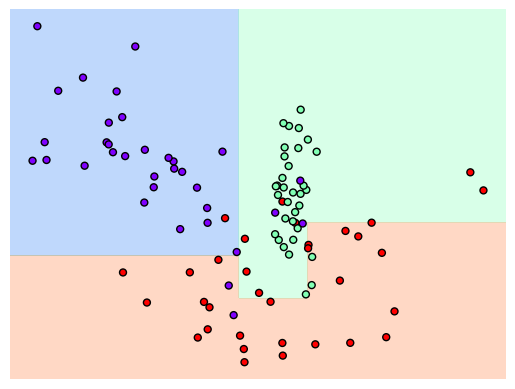

In [7]:
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6, random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/human_activity/features.txt', sep ='\s+', header = None, names = ['column_index','column_name'])
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 feature명에서 10개만 추출 : ', feature_name[:10])

전체 feature명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [9]:
# 중복된 이름의 columnn 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [10]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

[reset_index()](https://chat.openai.com/share/7d9d196b-e3e4-439a-b917-225f03142151)

In [14]:
import pandas as pd

def get_human_dataset():
  feature_name_df = pd.read_csv('/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/human_activity/features.txt', sep = '\s+', header= None, names = ['column_index', 'column_name'])
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # feature 이름 list 생성
  feature_name = new_feature_name_df.iloc[: , 1].values.tolist()
  X_train = pd.read_csv('/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/human_activity/train/X_train.txt', sep = '\s+', names = feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/human_activity/test/X_test.txt', sep = '\s+', names = feature_name)
  y_train = pd.read_csv('/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/human_activity/train/y_train.txt', sep = '\s+', names = ['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/human_activity/test/y_test.txt', sep = '\s+', names = ['action'])

  return X_train, X_test, y_train, y_test

X_train, X_test,  y_train, y_test = get_human_dataset()


In [15]:
print('##학습 피처 데이터셋 info()')
print(X_train.info())

##학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [16]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [17]:
# 정답 값의 분포 확인하기!
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


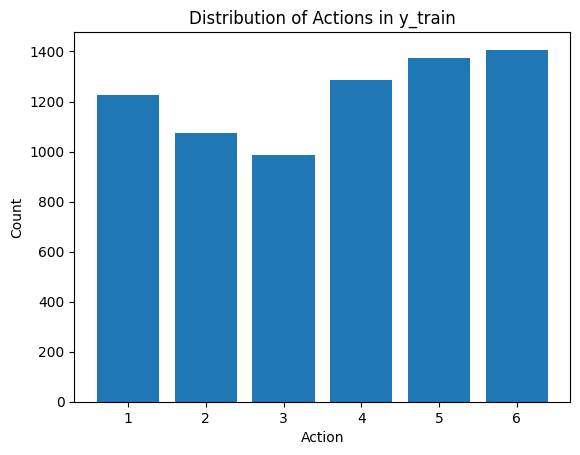

In [18]:
import matplotlib.pyplot as plt

# y_train['action'].value_counts() 결과를 기반으로 막대 그래프를 그립니다.
plt.bar(y_train['action'].value_counts().index, y_train['action'].value_counts().values)

# 그래프에 제목과 축 레이블을 추가합니다.
plt.title('Distribution of Actions in y_train')
plt.xlabel('Action')
plt.ylabel('Count')

# 그래프를 표시합니다.
plt.show()

# .value_counts() 메서드는 Series의 각 값에 대한 빈도를 반환
#  이 빈도는 Series의 값들을 index로 갖는 새로운 Series로 반환됨
# 이 때, 그 값들의 순서는 빈도수에 따라 내림차순으로 정렬
# plt.bar 함수를 사용할 때, 인덱스의 순서대로 막대를 그리기 때문에, 기본적으로 x 값이 오름차순으로 정렬

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

print('DecisionTreeClassifier의 기본 hyper parameter : \n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier의 기본 hyper parameter : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [30]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6,8,10, 12, 16, 20, 24], 'min_samples_split' : [16]}
grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24],
                         'min_samples_split': [16]},
             scoring='accuracy', verbose=1)

In [26]:
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적의 hyper parameter : ', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적의 hyper parameter :  {'max_depth': 8, 'min_samples_split': 16}


- verbose = 0: 아무런 출력을 하지 않습니다.
- verbose = 1: 그리드 서치의 진행 상황을 출력합니다. 각각의 매개변수 조합에 대한 시도와 관련된 정보를 출력합니다.

In [31]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [32]:
max_depths = [6,8,10, 12, 16, 20, 24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 16, random_state = 156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도 : 0.8551
max_depth = 8 정확도 : 0.8717
max_depth = 10 정확도 : 0.8599
max_depth = 12 정확도 : 0.8571
max_depth = 16 정확도 : 0.8599
max_depth = 20 정확도 : 0.8565
max_depth = 24 정확도 : 0.8565


In [33]:
params = {'max_depth' : [8,12,16,20], 'min_samples_split' : [16,24]}
grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [34]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도 : {0:4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.871734


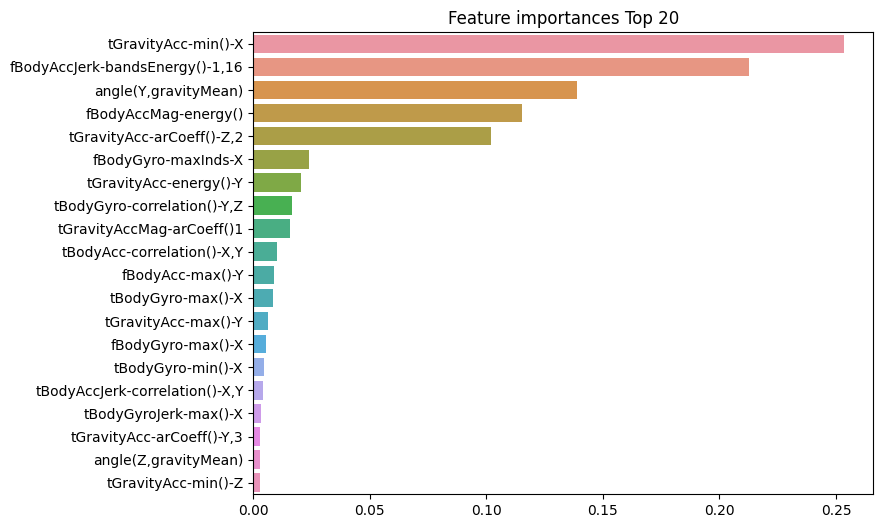

In [38]:
# 각 feature의 중요도
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8,6)) # plt.figure(figsize=(4, 3)): Sets the figure size to 8 inches by 6 inches.
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

### Seaborn 사용법
- plt(matplotlib.pyplot)를 사용하여 그림의 크기, 제목, 축 레이블 및 다양한 스타일과 속성을 지정할 수 있습니다.

- sns.barplot 함수를 사용하여 막대 그래프를 그릴 때에도 내부적으로는 Matplotlib이 사용되고 있습니다.
- plt를 직접적으로 호출하지 않고, sns.barplot 함수만 사용 가능.
- sns.barplot만 사용하여 Seaborn의 기능을 활용하여 막대 그래프를 생성하고 표시할 수 있습니다.

- Seaborn 함수를 호출할 때마다 기본적으로 Seaborn은 새로운 Matplotlib figure와 axes를 생성합니다.
- 만약 여러 그래프를 같은 figure에 그리고 싶다면, 해당 figure와 axes를 명시적으로 관리해주어야 합니다.